In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('housing.csv', skipinitialspace=True)

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.shape

(545, 13)

In [6]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [7]:
df['mainroad'] = df['mainroad'].map({'yes' : 1, 'no' : 0})
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1, 'no':0})

In [8]:
df.head().sort_values(by='price', ascending=False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [10]:
status=pd.get_dummies(df['furnishingstatus'])

In [11]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [12]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)

In [13]:
df=pd.concat([df,status],axis=1)

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [15]:
df.drop(['furnishingstatus'],axis=1,inplace=True)

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [17]:
df['areapb']=df['area']/df['bedrooms']

In [18]:
df['bbratio']=df['bathrooms']/df['bedrooms']

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areapb,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [20]:
def normalize(x):
    return((x-np.min(x))/(max(x)-min(x)))    

In [21]:
df=df.apply(normalize)
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'areapb',
       'bbratio'],
      dtype='object')

In [22]:
x=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'areapb',
       'bbratio']]
y=df['price']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.7, random_state=100)

In [24]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
lm1=sm.OLS(y_train,x_train).fit()

In [25]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           4.56e-82
Time:                        10:16:09   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

In [26]:
%matplotlib inline

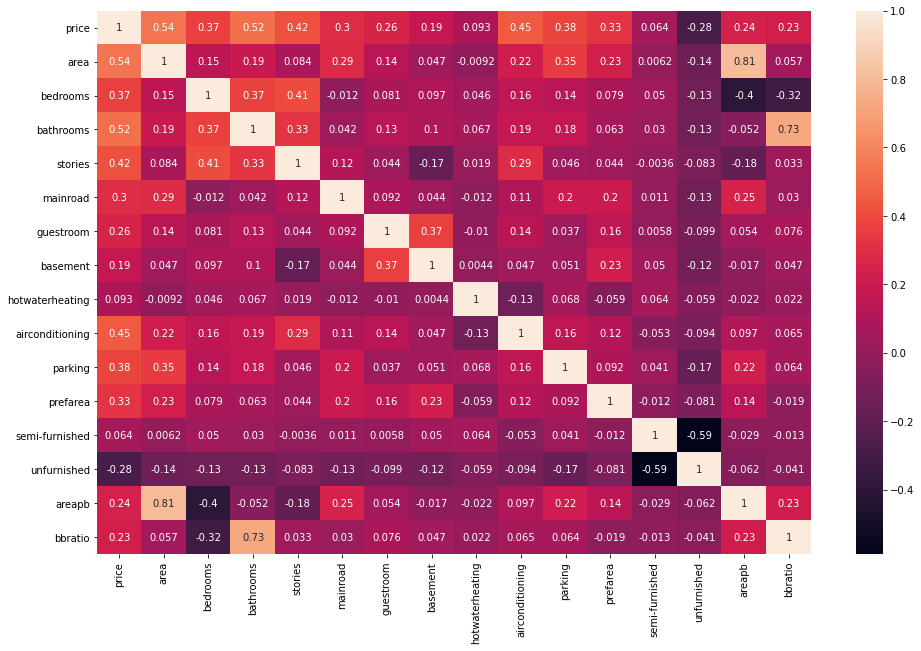

In [29]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [34]:
def vif_cal(input_data,dependent_col):
    vif_df=pd.DataFrame(columns=['Var','Vif'])
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i]=[xvar_names[i],vif]
        
    return vif_df.sort_values(by='Vif', axis=0, ascending=True, inplace=False)

In [35]:
vif_cal(input_data=df, dependent_col='price')

,Var,Vif
7,hotwaterheating,1.10
5,guestroom,1.49
10,prefarea,1.51
8,airconditioning,1.77
9,parking,2.01
6,basement,2.05
12,unfurnished,2.38
11,semi-furnished,2.61
3,stories,2.81
4,mainroad,7.91


In [36]:
x_train=x_train.drop('bbratio',1)

In [37]:
x_train.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areapb
359,1.0,0.134021,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.131693
19,1.0,0.327835,0.4,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1.0,0.0,0.282843
159,1.0,0.103093,0.4,0.333333,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.107574
35,1.0,0.367698,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.313930
28,1.0,0.432990,0.8,0.333333,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,1.0,0.194404


In [38]:
lm_2=sm.OLS(y_train, x_train).fit()

In [40]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           6.46e-83
Time:                        11:23:56   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [42]:
vif_cal(input_data=df.drop(['bbratio'],axis=1),dependent_col='price')

,Var,Vif
7,hotwaterheating,1.09
5,guestroom,1.48
10,prefarea,1.51
2,bathrooms,1.71
8,airconditioning,1.77
9,parking,2.00
6,basement,2.03
12,unfurnished,2.20
11,semi-furnished,2.48
3,stories,2.78


In [43]:
x_train=x_train.drop('bedrooms',1)

In [44]:
lm_3=sm.OLS(y_train, x_train).fit()

In [45]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.66e-83
Time:                        11:30:23   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [47]:
vif_cal(input_data=df.drop(['bedrooms','bbratio'],axis=1),dependent_col='price')

,Var,Vif
6,hotwaterheating,1.09
4,guestroom,1.48
9,prefarea,1.50
1,bathrooms,1.69
11,unfurnished,1.72
7,airconditioning,1.76
5,basement,1.90
8,parking,2.00
10,semi-furnished,2.04
2,stories,2.56


In [48]:
x_train=x_train.drop(['areapb'],axis=1)

In [49]:
lm_4=sm.OLS(y_train,x_train).fit()

In [50]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           2.35e-83
Time:                        11:35:20   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [51]:
vif_cal(input_data=df.drop(['bedrooms','bbratio','areapb'],axis=1),dependent_col='price')

,Var,Vif
6,hotwaterheating,1.09
4,guestroom,1.47
9,prefarea,1.50
1,bathrooms,1.62
11,unfurnished,1.65
7,airconditioning,1.76
5,basement,1.90
8,parking,1.99
10,semi-furnished,2.00
2,stories,2.32


In [52]:
x_train=x_train.drop(['semi-furnished'],1)

In [53]:
lm_5=sm.OLS(y_train,x_train).fit()

In [55]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           2.73e-84
Time:                        11:38:39   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [57]:
vif_cal(input_data=df.drop(['bedrooms','bbratio','areapb','semi-furnished'], axis=1),dependent_col='price')

,Var,Vif
6,hotwaterheating,1.08
10,unfurnished,1.34
4,guestroom,1.47
9,prefarea,1.49
1,bathrooms,1.62
7,airconditioning,1.75
5,basement,1.86
8,parking,1.99
2,stories,2.30
0,area,4.36


In [58]:
x_train=x_train.drop(['basement'],1)

In [59]:
lm_6=sm.OLS(y_train,x_train).fit()

In [60]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           3.13e-84
Time:                        11:43:05   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [61]:
vif_cal(input_data=df.drop(['bedrooms','bbratio','areapb','semi-furnished','basement'], axis=1),dependent_col='price')

,Var,Vif
5,hotwaterheating,1.08
4,guestroom,1.29
9,unfurnished,1.34
8,prefarea,1.44
1,bathrooms,1.59
6,airconditioning,1.75
7,parking,1.99
2,stories,2.21
0,area,4.36
3,mainroad,4.58


In [62]:
x_test_m6=sm.add_constant(x_test)

In [64]:
x_test_m6=x_test_m6.drop(['bedrooms','bbratio','areapb','semi-furnished','basement'],axis=1)

In [65]:
y_pred_m6=lm_6.predict(x_test_m6)

Text(0, 0.5, 'price')

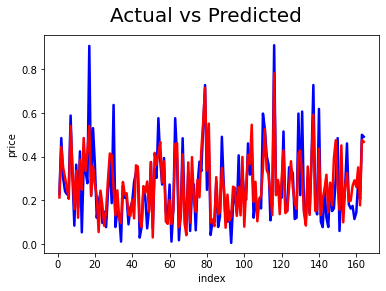

In [67]:
c=[i for i in range(1,165,1)]
fig=plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred_m6,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual vs Predicted',fontsize=20)
plt.xlabel('index',fontsize=10)
plt.ylabel('price',fontsize=10)

Text(0, 0.5, 'y_pred')

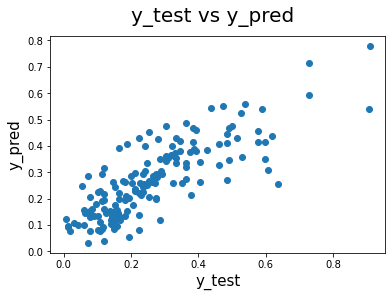

In [68]:
fig=plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred',fontsize=15)

Text(0, 0.5, 'ytest-ypred')

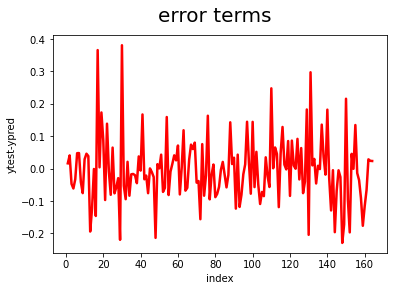

In [70]:
fig=plt.figure()
c=[i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m6,color='red',linewidth=2.5, linestyle='-')
fig.suptitle('error terms',fontsize=20)
plt.xlabel('index',fontsize=10)
plt.ylabel('ytest-ypred',fontsize=10)

Text(0, 0.5, 'index')

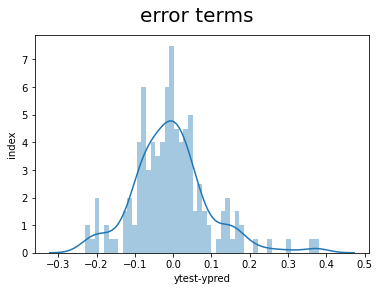

In [71]:
fig=plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50)
fig.suptitle('error terms',fontsize=20)
plt.xlabel('ytest-ypred',fontsize=10)
plt.ylabel('index',fontsize=10)

In [73]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_m6)))

RMSE: 0.10001092336807833
